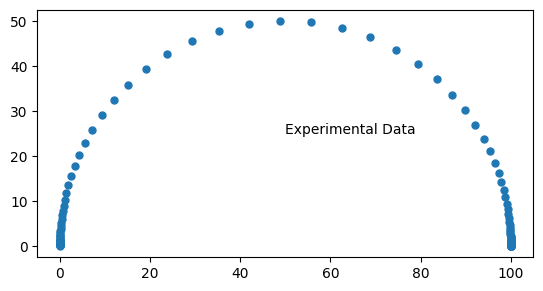

In [38]:
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt

c = CustomCircuit(initial_guess=[100,1e-3],circuit="p(R_1,C_1)")
z_exp=c.predict(frequencies=np.logspace(-3,3,100))

plt.plot(np.real(z_exp),-np.imag(z_exp),"o",ms=5)
plt.gca().text(0.5,0.5,"Experimental Data",transform=plt.gca().transAxes)
plt.gca().set_aspect("equal")

In [45]:
from scipy.optimize import minimize

# def fun(params,@z_model,(wt)):

#     chi_sqr=wt*(exp_data-z_model(params))**2

#     return z 

import numpy as np
def fun(params):
    R=params[0]
    C=params[1]
    # omega=arg[0:len(arg)/2]
    omega=np.array([0.1,1,10])
    z_exp=np.array([1+1j,0.5+0.6j,0.3+2j])
    # z_exp=arg[len(arg)/2:len(arg)]
    
    chi_total=0
    for w in omega:
        #z_model at that frequency
        z_model=1/(1/R+1j*C*omega)
        chi_real=(np.real(z_model)-np.real(z_exp))**2
        chi_imag=(np.imag(z_model)-np.imag(z_exp))**2
        chi_total+=(chi_real+chi_imag)
    
    return chi_total

# x=np.linspace(1,100,1000)
# plt.plot(x,fun(x))
result=minimize(fun,(100,1e-3))

ValueError: The user-provided objective function must return a scalar value.

In [27]:
print(result.nit)

2
